>[Solar power plant: How it works?](#scrollTo=PLkIxy6CHkDz)

>>>>[Long story short: when a photon hits the surface of the photovoltaic cell, its energy is transferred to the electrons present on the silicon cell. These electrons are "excited" and begin to flow in the circuit producing electric current. A solar panel produces Direct Current energy,(DC power).](#scrollTo=PLkIxy6CHkDz)

>>>>[Then, it's up to the inverter to convert it into alternating current to transport it and use it in our distribution networks. In fact, domestic and industrial buildings are designed for the transport and use of alternating current.](#scrollTo=PLkIxy6CHkDz)

>>>>[Every solar power plant consists at least of two basic components:](#scrollTo=PLkIxy6CHkDz)

>>>>[Typically the factors that determine the performance of a solar power plant are:](#scrollTo=PLkIxy6CHkDz)

>[So where are the challenges?](#scrollTo=PLkIxy6CHkDz)

>>[Before going into deep with our tasks, a quick EDA on PLANT_1:](#scrollTo=PLkIxy6CHkDz)

>[Daily Yield & AC-DC power](#scrollTo=WcjNahNfHkEA)

>[Daily and Total Yield](#scrollTo=AruY81KwHkEC)

>[Irradiation,Ambient and Module temperature](#scrollTo=l231JiSDHkED)

>[Task 1: Can we identify faulty or suboptimally performing equipment?](#scrollTo=hghs-_8WHkEF)

>>[Real DC power converted](#scrollTo=AnaIQQDWHkEF)

>>[DC power generated during day hours](#scrollTo=9sX1hZ86HkEG)

>>[Which inverter is underperforming?](#scrollTo=VSMAbUdIHkEG)

>>[DC POWER and DAILY YIELD in PLANT_1](#scrollTo=t7ih3-yOHkEI)

>>>>[It seems that in some days there have been several problems with the plant, i.e. between 2020-05-19 and 2020-05-21 we can see a period which has null values that are common in daily yield and dc power generation. This may be due to a technical problem of the plant. Let's give a further look to ambient and module temperature:](#scrollTo=lA-BtQGAHkEK)

>>[Module temperature and Ambient Temperature on PLANT_1](#scrollTo=hsGiF_tuHkEL)

>>[Inverter bvBOhCH3iADSZry in action](#scrollTo=20RXPBnuHkEL)

>[Task 2: Forecast](#scrollTo=3L6LxeEGHkEM)

>>>>[Our data:](#scrollTo=R2nspogeHkEM)

>>[Step 1: Testing for Stationarity](#scrollTo=RoznV-COHkEN)

>>[Step 2: Split into train and test datasets to build the model on the training dataset and forecast using the test dataset.](#scrollTo=NWU28GXhHkEN)

>>[Step 3: Tune with the auto_arima function:](#scrollTo=cznoAcAHHkEO)

>>[Step 4: Use the trained model which was built earlier to forecast daily yields](#scrollTo=KteQPA7oHkET)

>>[Model summary:](#scrollTo=QDs4r6ytHkEU)



# Solar power plant: How it works?
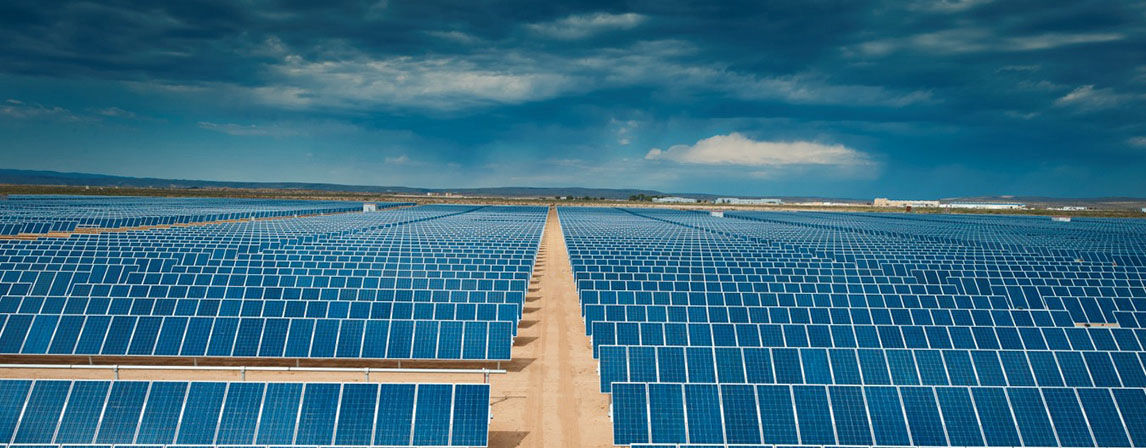

#### Long story short: when a photon hits the surface of the photovoltaic cell, its energy is transferred to the electrons present on the silicon cell. These electrons are "excited" and begin to flow in the circuit producing electric current. A solar panel produces Direct Current energy,(DC power).
#### Then, it's up to the inverter to convert it into alternating current to transport it and use it in our distribution networks. In fact, domestic and industrial buildings are designed for the transport and use of alternating current.

#### Every solar power plant consists at least of two basic components:
1. Modules- that convert sunlight into electricity
2. One or more inverters- devices that convert direct current into alternating current.

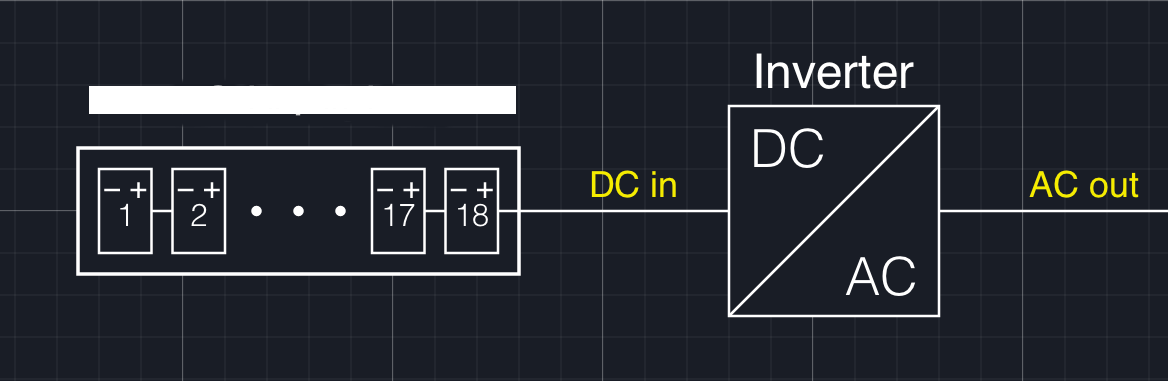

#### Typically the factors that determine the performance of a solar power plant are:
* Temperature
* Dirtiness
* Inverters Efficiency
* Inverters or panels seniority

# So where are the challenges?

We will answer two main question:

1. Can we identify faulty or suboptimally performing equipment?
2. Can we predict the power generation for next couple of days? - this allows for better grid management


Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import datetime as dt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

The code reads two CSV files, one for the generation data and another for the weather sensor data of "Plant 1". It drops the 'PLANT_ID' column from both datasets and converts the 'DATE_TIME' column to a datetime format for proper date handling.






In [2]:
gen_1=pd.read_csv('data/Plant_1_Generation_Data.csv')
gen_1.drop('PLANT_ID',1,inplace=True)
sens_1= pd.read_csv('data/Plant_1_Weather_Sensor_Data.csv')
sens_1.drop('PLANT_ID',1,inplace=True)
#format datetime
gen_1['DATE_TIME']= pd.to_datetime(gen_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
sens_1['DATE_TIME']= pd.to_datetime(sens_1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

# Daily Yield & AC-DC power

The code creates two subplots, one displaying the daily yield over time, and the other showing AC and DC power during day hours. The plots help visualize the daily energy generation and the relationship between AC and DC power.






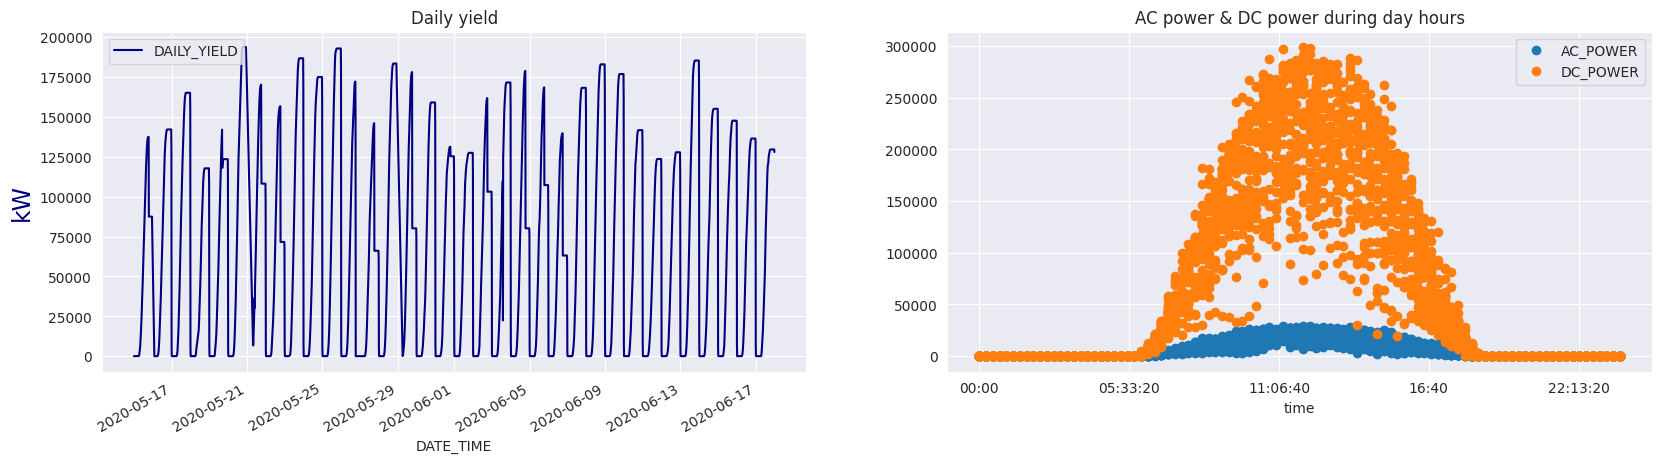

In [3]:
df_gen=gen_1.groupby('DATE_TIME').sum().reset_index()
df_gen['time']=df_gen['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# daily yield plot
df_gen.plot(x='DATE_TIME',y='DAILY_YIELD',color='navy',ax=ax[0])
# AC & DC power plot
df_gen.set_index('time').drop('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[1])

ax[0].set_title('Daily yield',)
ax[1].set_title('AC power & DC power during day hours')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

# Daily and Total Yield

The code aggregates daily energy generation data and presents it in two plots: the first plot displays the daily yield over dates, and the second plot shows the total yield for each date in a bar chart.






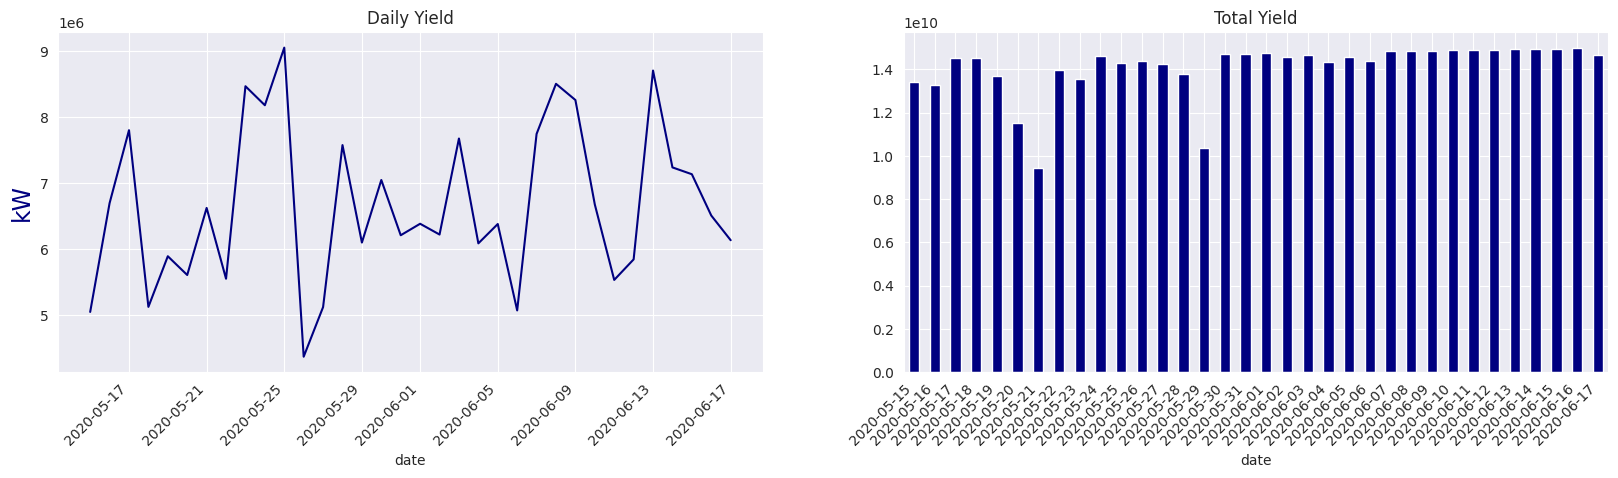

In [4]:
daily_gen=df_gen.copy()
daily_gen['date']=daily_gen['DATE_TIME'].dt.date

daily_gen=daily_gen.groupby('date').sum()

fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5))
daily_gen['DAILY_YIELD'].plot(ax=ax[0],color='navy')
daily_gen['TOTAL_YIELD'].plot(kind='bar',ax=ax[1],color='navy')
fig.autofmt_xdate(rotation=45)
ax[0].set_title('Daily Yield')
ax[1].set_title('Total Yield')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

# Irradiation,Ambient and Module temperature

The code aggregates weather sensor data and presents it in two plots: the first plot shows the irradiation during day hours over time, and the second plot displays the ambient and module temperature over time.






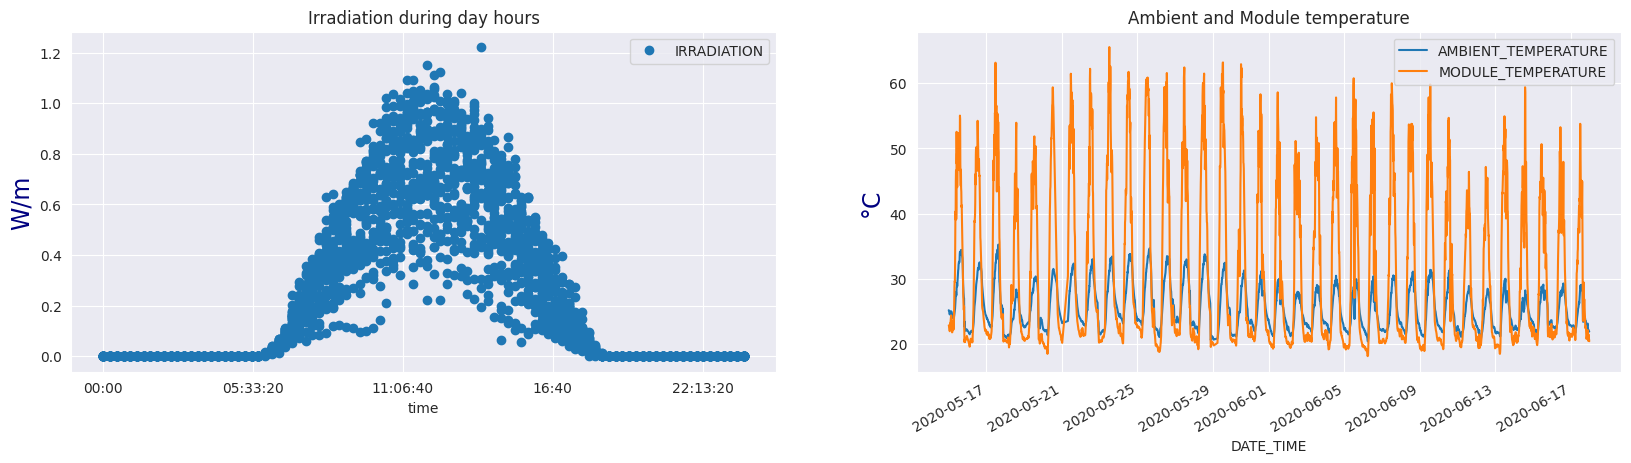

In [5]:
df_sens=sens_1.groupby('DATE_TIME').sum().reset_index()
df_sens['time']=df_sens['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# daily yield plot
df_sens.plot(x='time',y='IRRADIATION',ax=ax[0],style='o')
# AC & DC power plot
df_sens.set_index('DATE_TIME').drop('time',1)[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].plot(ax=ax[1])

ax[0].set_title('Irradiation during day hours',)
ax[1].set_title('Ambient and Module temperature')
ax[0].set_ylabel('W/m',color='navy',fontsize=17)
ax[1].set_ylabel('°C',color='navy',fontsize=17)


plt.show()

# Task 1: Can we identify faulty or suboptimally performing equipment?

Well let's see how all inverters works during day hours, cause we know from the quick eda that something went wrong with dc power generation:
Notice that what matters for us is the DC power generation that then is converted in AC power for domestic use:

## Real DC power converted
The code calculates the percentage of DC power converted into AC power for each day and then plots the daily percentage as a line plot. It also includes a horizontal line indicating the mean percentage of DC power conversion.






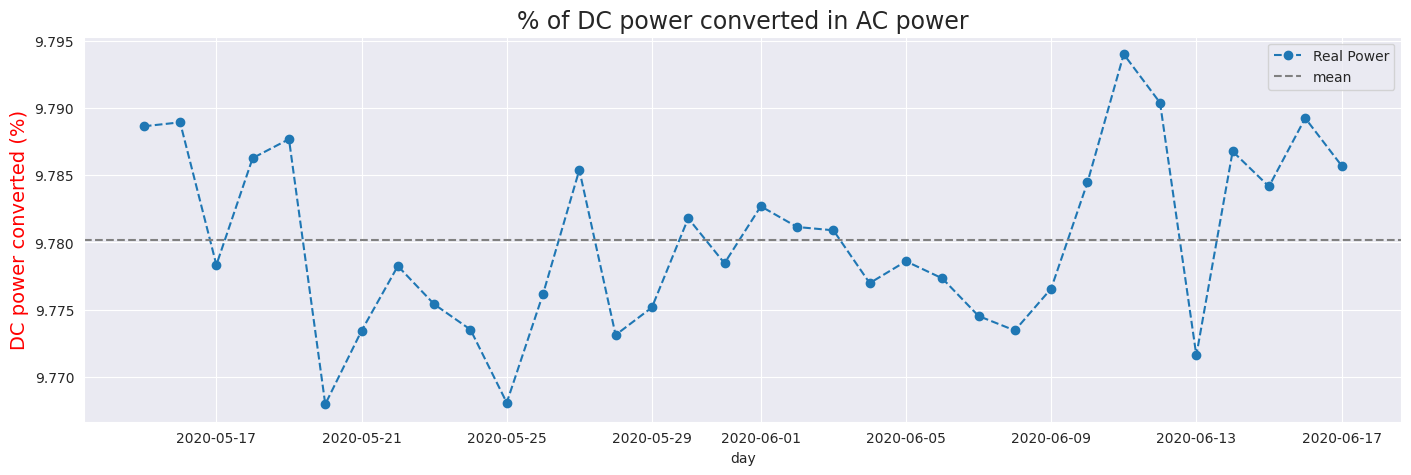

In [6]:
losses=gen_1.copy()
losses['day']=losses['DATE_TIME'].dt.date
losses=losses.groupby('day').sum()
losses['losses']=losses['AC_POWER']/losses['DC_POWER']*100

losses['losses'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='red')
plt.axhline(losses['losses'].mean(),linestyle='--',color='gray',label='mean')
plt.legend()
plt.show()

## DC power generated during day hours

The code creates a line plot showing the variation of DC power output during the day for different sources (solar panels). Each source is represented by a unique color and marker style on the plot. The y-axis represents the DC power output in kW, and the x-axis represents the time of the day.






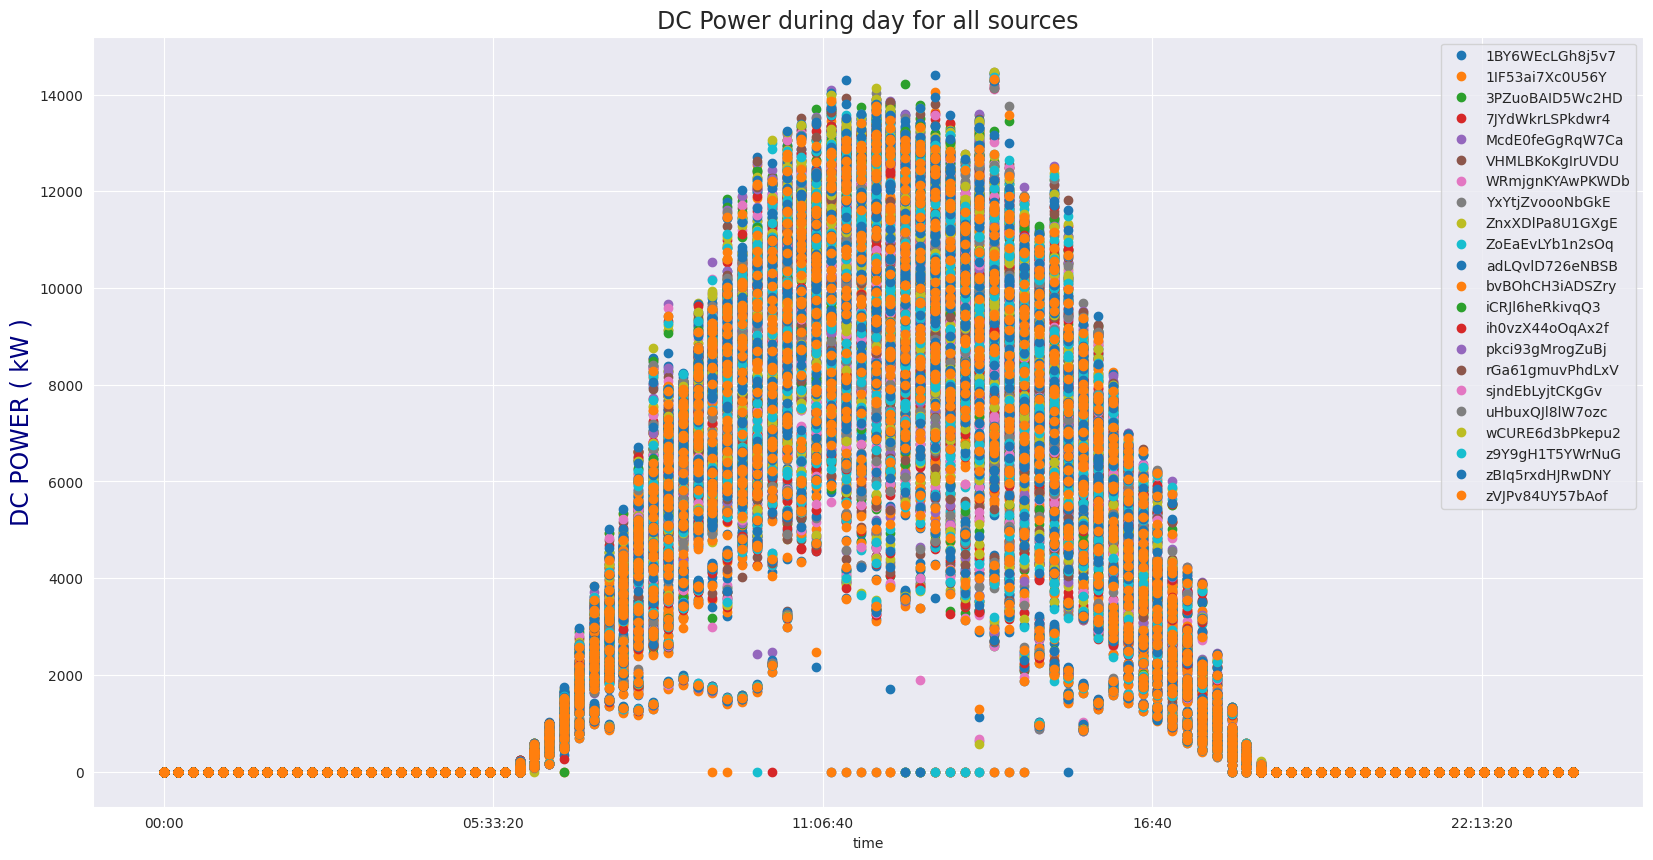

In [7]:
sources=gen_1.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style='o',legend=True,figsize=(20,10))
plt.title('DC Power during day for all sources',size=17)
plt.ylabel('DC POWER ( kW )',color='navy',fontsize=17)
plt.show()

## Which inverter is underperforming?

The code creates two line plots, each showing the variation of DC power output during the day for 11 different sources (solar panels). The sources are grouped into two plots, and each source is represented by a unique color on the plot. The y-axis represents the DC power output in kW, and the x-axis represents the time of the day.






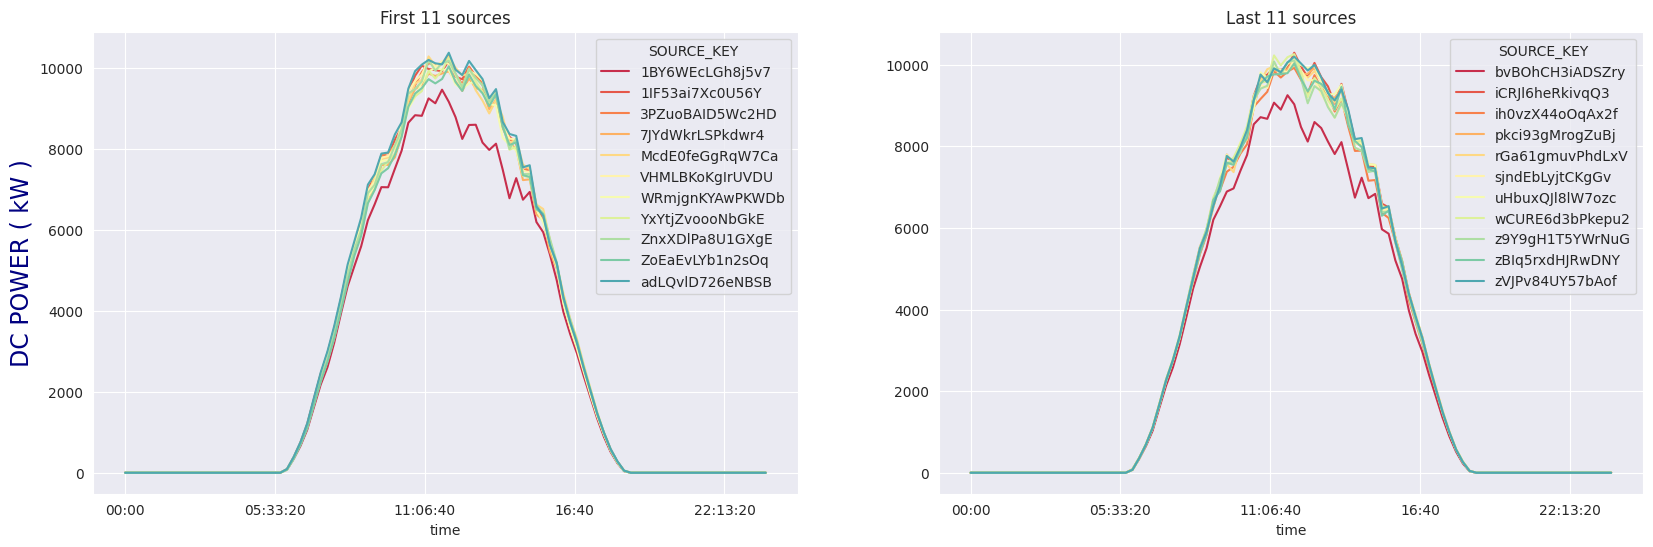

In [8]:
dc_gen=gen_1.copy()
dc_gen['time']=dc_gen['DATE_TIME'].dt.time
dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
dc_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('Last 11 sources')
plt.show()

The code creates a DataFrame containing the average DC power output values for each time of the day (represented by 'time') and each day (represented by 'day'). The 'temp1_gen' DataFrame is created from the 'gen_1' DataFrame, while the 'temp1_sens' DataFrame is created from the 'sens_1' DataFrame. The 'cols' DataFrame represents the average DC power output for each time and day.






In [9]:
temp1_gen=gen_1.copy()

temp1_gen['time']=temp1_gen['DATE_TIME'].dt.time
temp1_gen['day']=temp1_gen['DATE_TIME'].dt.date


temp1_sens=sens_1.copy()

temp1_sens['time']=temp1_sens['DATE_TIME'].dt.time
temp1_sens['day']=temp1_sens['DATE_TIME'].dt.date

# just for columns
cols=temp1_gen.groupby(['time','day'])['DC_POWER'].mean().unstack()

## DC POWER and DAILY YIELD in PLANT_1

The code creates a grid of subplots, each showing the average DC power and daily yield values for different days and times of the day. The 'temp1_gen' DataFrame is used for the DC power values, and the 'temp1_gen' DataFrame is used for the daily yield values. The subplots are labeled with the corresponding day and time information.






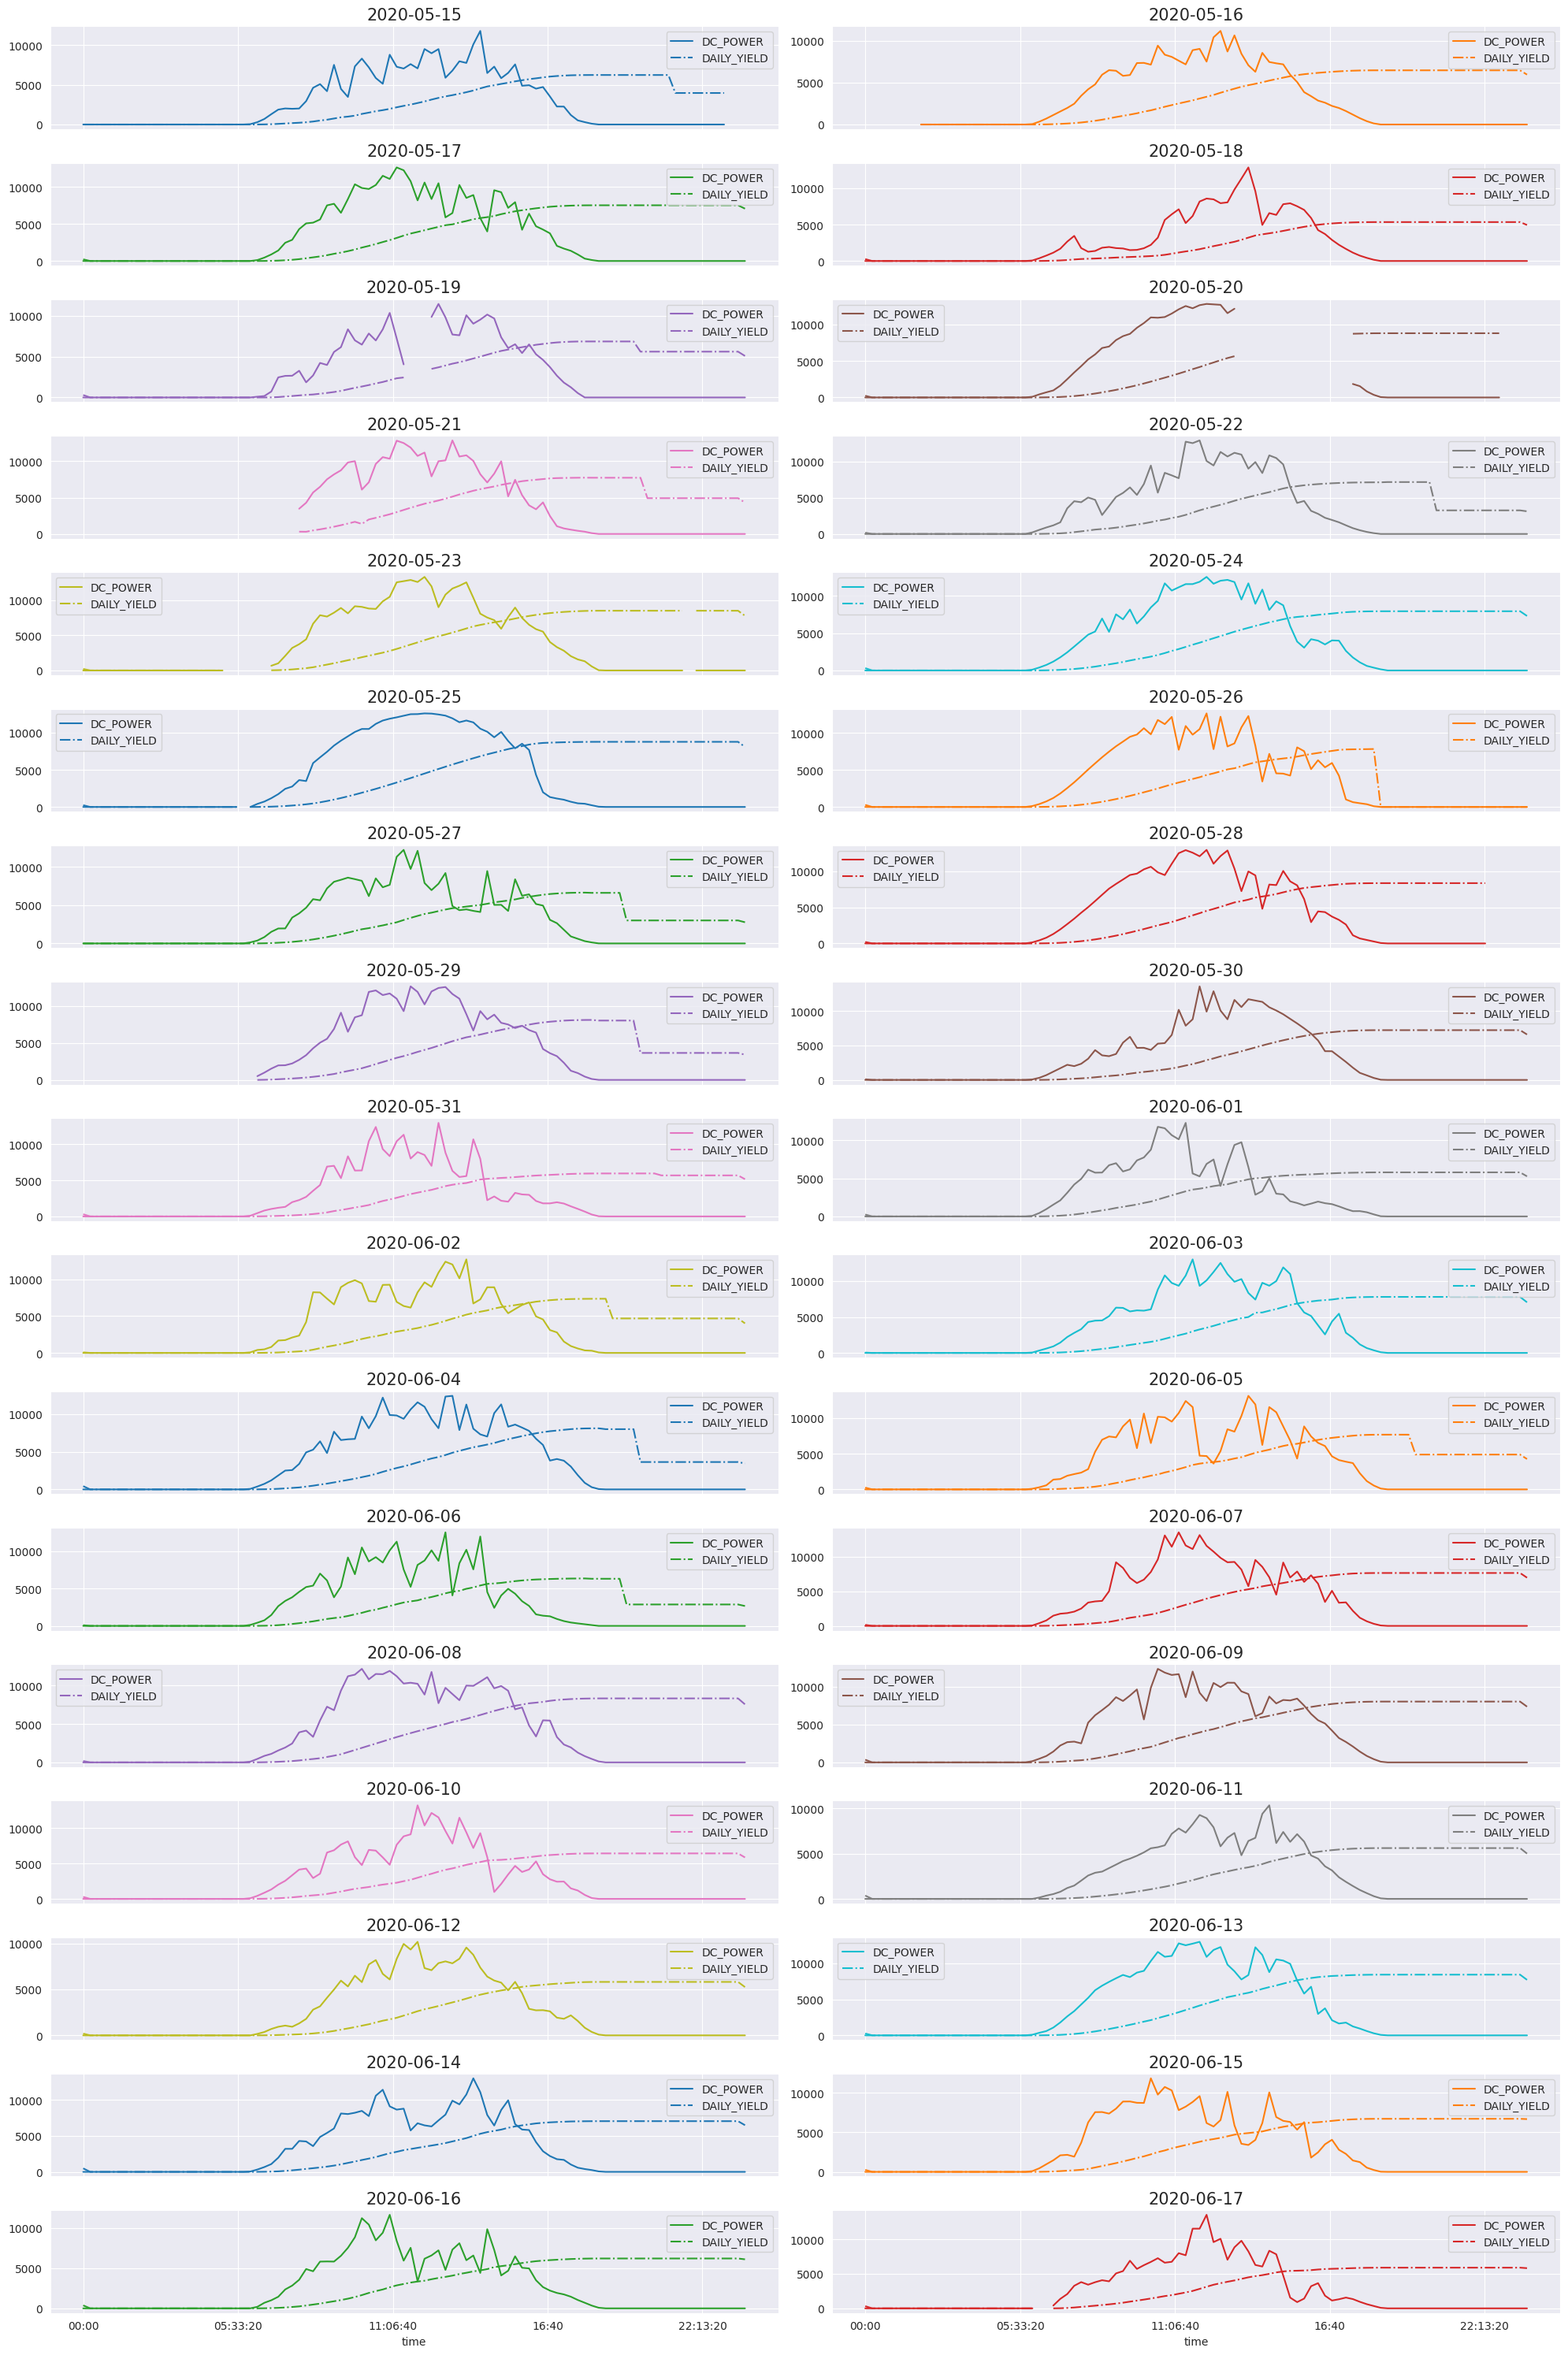

In [10]:
ax =temp1_gen.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
temp1_gen.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

#### It seems that in some days there have been several problems with the plant, i.e. between 2020-05-19 and 2020-05-21 we can see a period which has null values that are common in daily yield and dc power generation. This may be due to a technical problem of the plant. Let's give a further look to ambient and module temperature:

## Module temperature and Ambient Temperature on PLANT_1

The code creates a grid of subplots, each showing the average module temperature and ambient temperature values for different days and times of the day. The 'temp1_sens' DataFrame is used for the temperature values. The subplots are labeled with the corresponding day and time information, and a horizontal line at 50 degrees Celsius is added to each subplot.






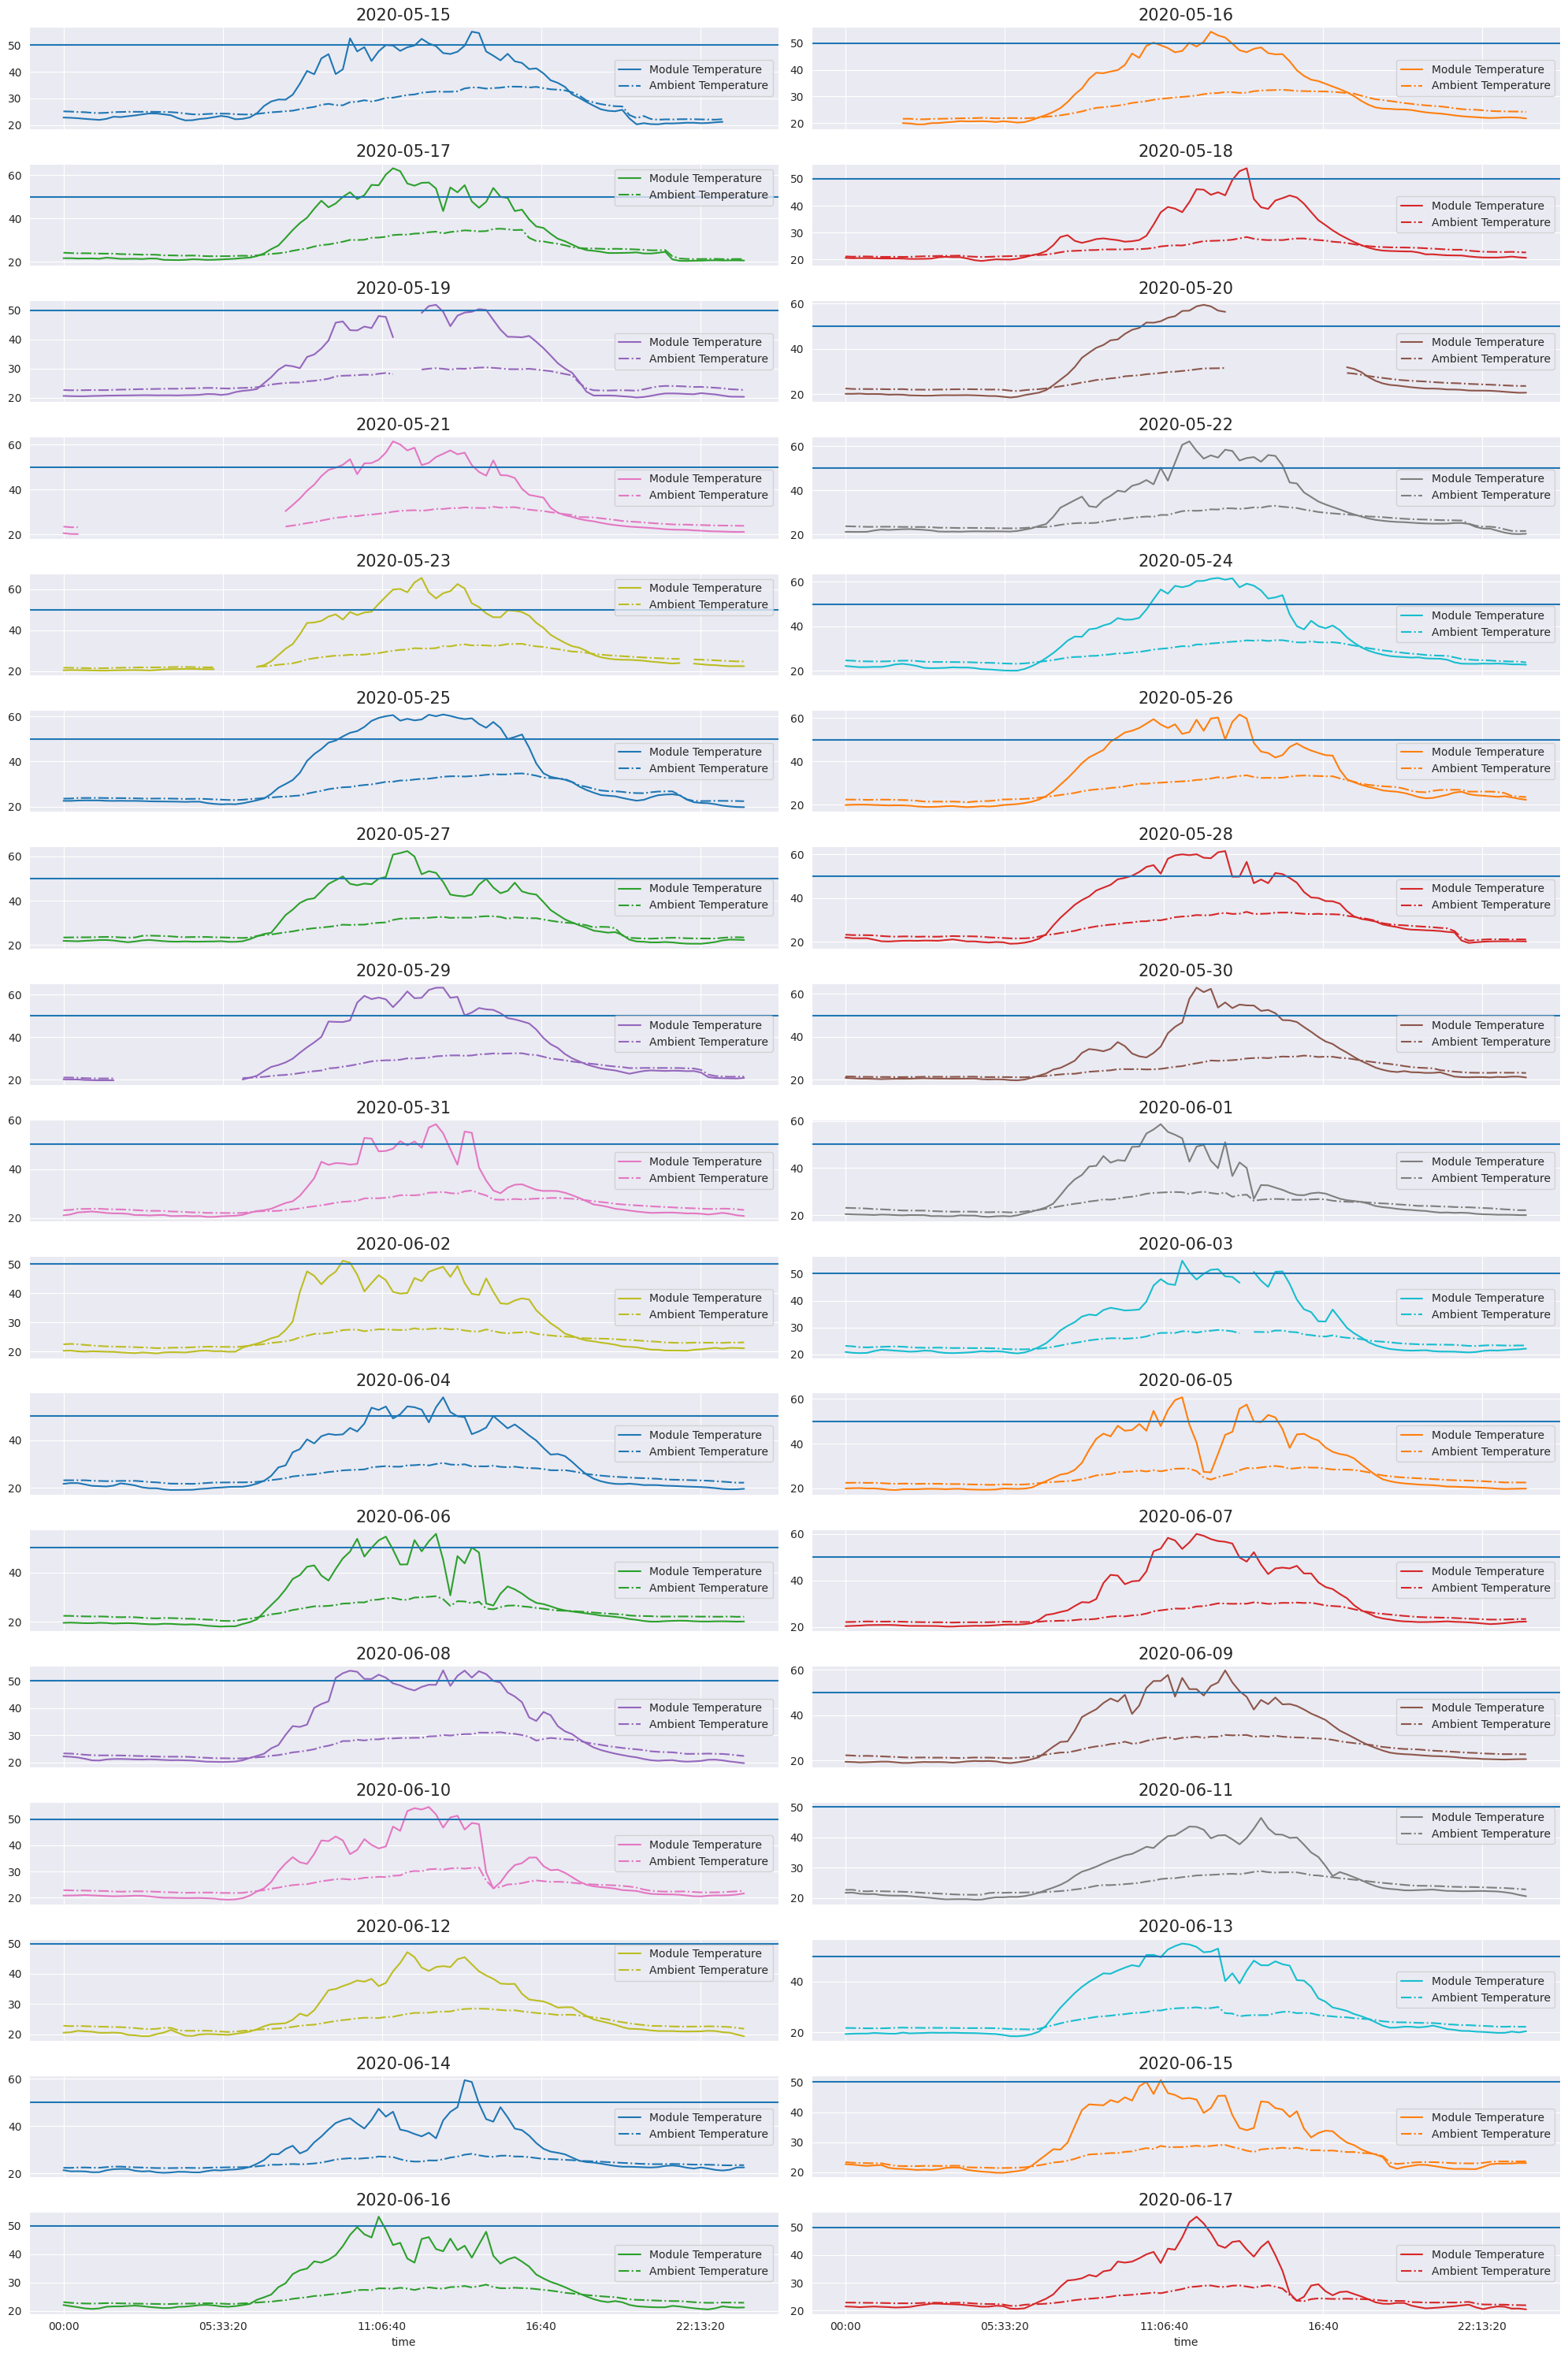

In [11]:
ax= temp1_sens.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
temp1_sens.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

## Inverter bvBOhCH3iADSZry in action

The code filters the 'gen_1' DataFrame to select data for a specific source with the ID 'bvBOhCH3iADSZry', then it creates a grid of subplots to show the average DC power and daily yield for this specific source, aggregated by different days and times of the day. The subplots are labeled with the corresponding day and time information, and the daily yield data is plotted using a dashed line.






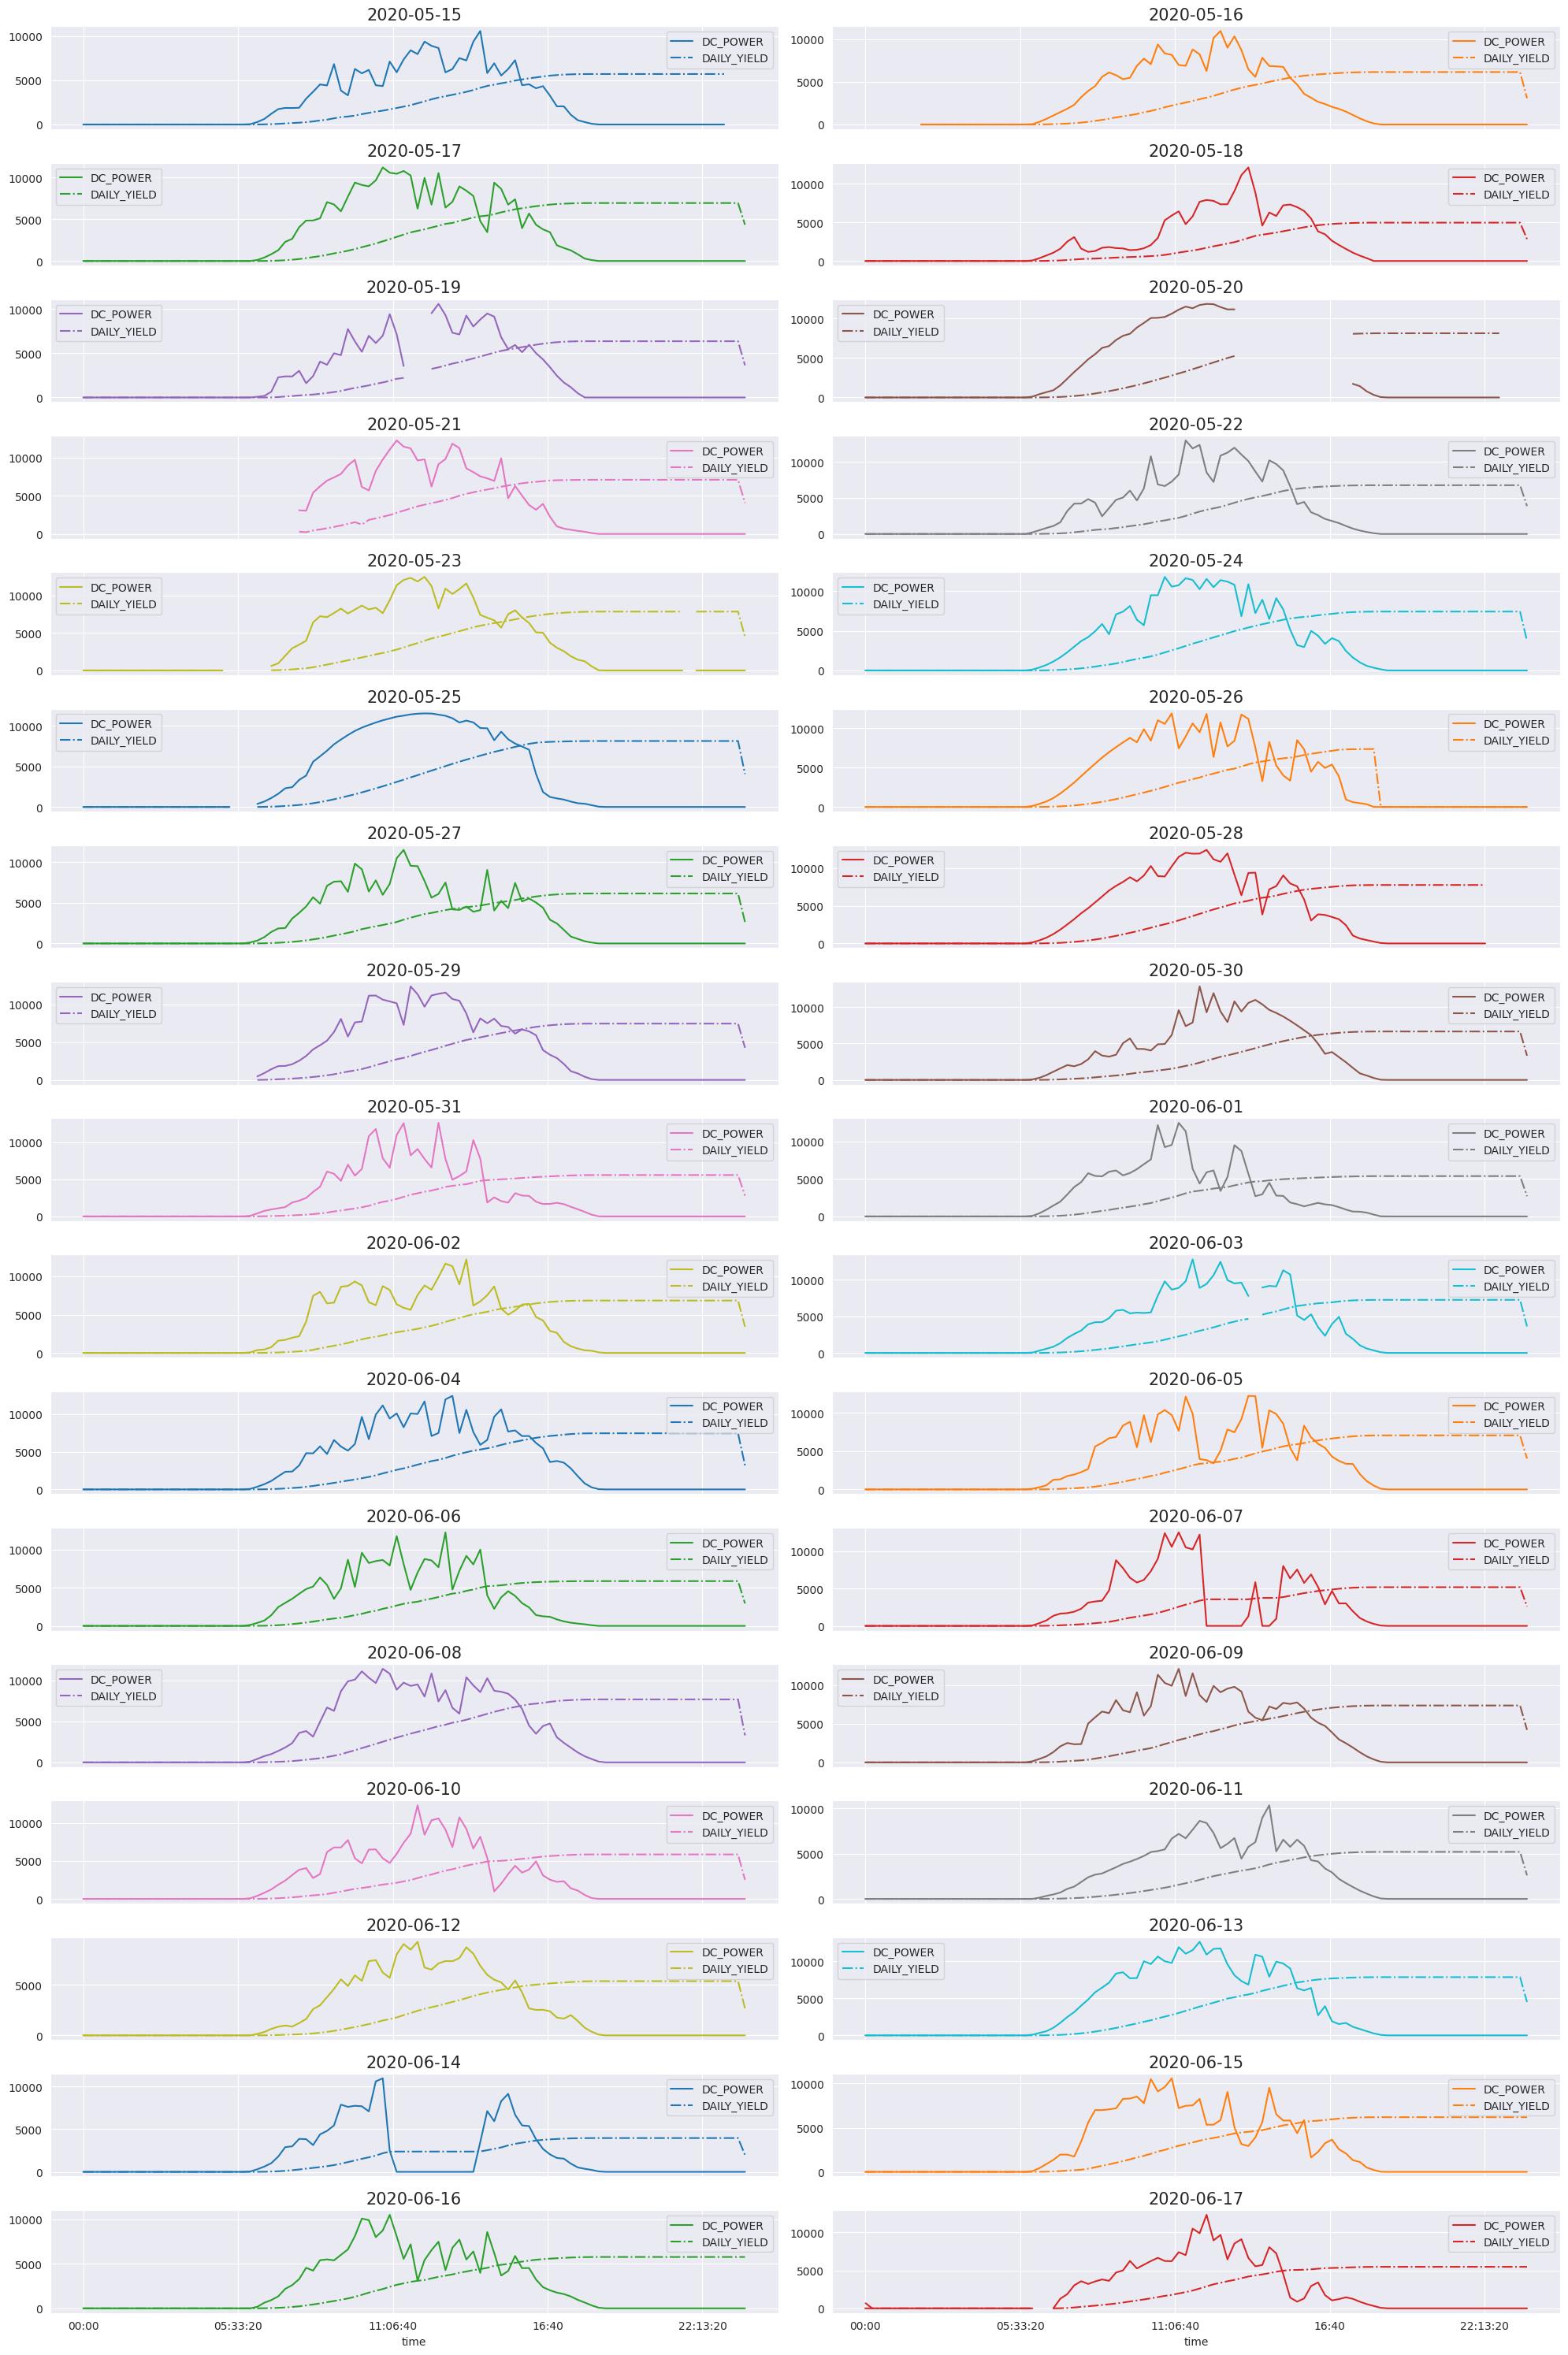

In [12]:
worst_source=gen_1[gen_1['SOURCE_KEY']=='bvBOhCH3iADSZry']
worst_source['time']=worst_source['DATE_TIME'].dt.time
worst_source['day']=worst_source['DATE_TIME'].dt.date

ax=worst_source.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
worst_source.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30),ax=ax,style='-.')

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

# Task 2: Forecast
Importing and installing some necessary libraries

In [13]:
from pandas.tseries.offsets import DateOffset
! pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.1 MB/s eta 0:00:00


#### Our data:

The code groups the 'gen_1' DataFrame by 'DATE_TIME', sums up the daily yield values, and then selects the last 288 rows (recent data) to create a new DataFrame called 'pred_gen' with the daily yield values for the last 288 time intervals. The 'DATE_TIME' column is set as the index of the new DataFrame.



In [14]:
pred_gen=gen_1.copy()
pred_gen=pred_gen.groupby('DATE_TIME').sum()
pred_gen=pred_gen['DAILY_YIELD'][-288:].reset_index()
pred_gen.set_index('DATE_TIME',inplace=True)
pred_gen.head()

DAILY_YIELD
DATE_TIME                         
2020-06-14 23:30:00  155054.000000
2020-06-14 23:45:00  142682.392857
2020-06-15 00:00:00    5480.000000
2020-06-15 00:15:00       0.000000
2020-06-15 00:30:00       0.000000

## Step 1: Testing for Stationarity

The code performs the Augmented Dickey-Fuller Test on the 'DAILY_YIELD' time series data stored in the 'pred_gen' DataFrame. It prints the test statistics and p-values and then interprets the test results. If the p-value is less than or equal to 0.05, it indicates strong evidence against the null hypothesis, implying the data has no unit root and is stationary. Otherwise, it suggests weak evidence against the null hypothesis, indicating the time series has a unit root and is non-stationary.



In [15]:
result = adfuller(pred_gen['DAILY_YIELD'])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.289937647479362
p-value : 0.17523382074929644
#Lags Used : 1
Number of Observations Used : 286
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Step 2: Split into train and test datasets to build the model on the training dataset and forecast using the test dataset.

The code separates the 'pred_gen' time series data into training (first 192 data points) and test (last 96 data points) sets and then plots the last 4 days of the 'DAILY_YIELD' values with different colors for train and test data, showing the data split.






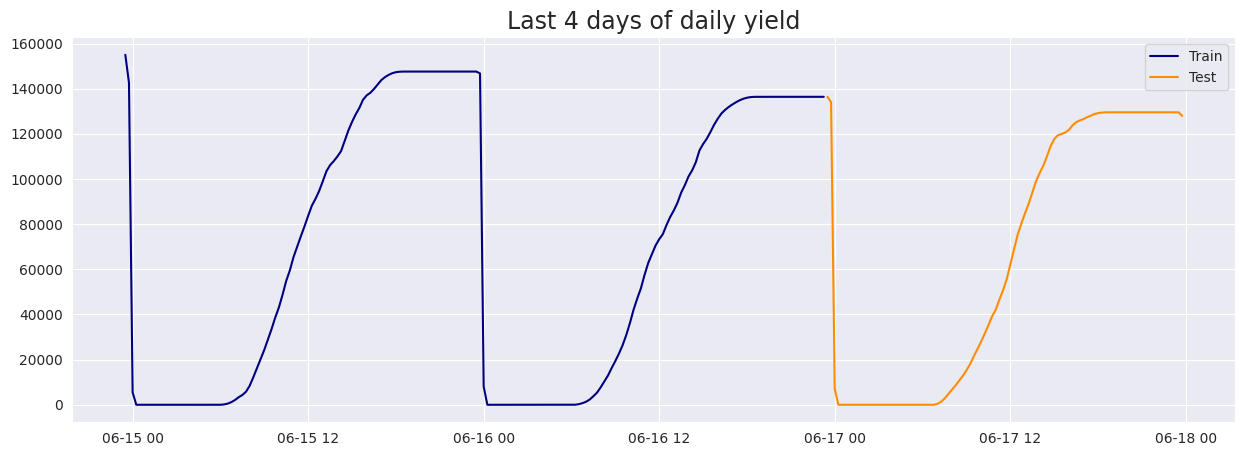

In [16]:
train=pred_gen[:192]
test=pred_gen[-96:]
plt.figure(figsize=(15,5))
plt.plot(train,label='Train',color='navy')
plt.plot(test,label='Test',color='darkorange')
plt.title('Last 4 days of daily yield',fontsize=17)
plt.legend()
plt.show()

## Step 3: Tune with the auto_arima function:

The code uses the auto_arima function from the pmdarima library to automatically select the best ARIMA model for the 'train' time series data with seasonal components. It specifies various ARIMA hyperparameters (p, d, q, P, D, Q, m) as well as other options for the model fitting process.






In [17]:
arima_model = auto_arima(train,
                         start_p=0,d=1,start_q=0,
                         max_p=1,max_d=1,max_q=1,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=20,n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=1645.555, Time=2.80 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=1539.889, Time=47.59 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=1541.502, Time=96.30 sec
 ARIMA(1,1,0)(0,1,0)[96]             : AIC=1539.528, Time=5.11 sec
 ARIMA(1,1,0)(0,1,1)[96]             : AIC=1539.889, Time=48.69 sec
 ARIMA(1,1,0)(1,1,1)[96]             : AIC=inf, Time=98.61 sec
 ARIMA(1,1,1)(0,1,0)[96]             : AIC=1539.385, Time=10.51 sec
 ARIMA(1,1,1)(1,1,0)[96]             : AIC=1541.299, Time=95.65 sec
 ARIMA(1,1,1)(0,1,1)[96]             : AIC=1541.299, Time=94.31 sec
 ARIMA(1,1,1)(1,1,1)[96]             : AIC=inf, Time=114.56 sec
 ARIMA(0,1,1)(0,1,0)[96]             : AIC=1541.342, Time=5.58 sec
 ARIMA(1,1,1)(0,1,0)[96] intercept   : AIC=1537.014, Time=15.11 sec
 ARIMA(1,1,1)(1,1,0)[96] intercept   : AIC=1539.039, Time=88.67 sec
 ARIMA(1,1,1)(0,1,1)[96] intercept   : AIC=1539.041, Time=81.14 sec
 ARIMA(1,1,1)(1,1

## Step 4: Use the trained model which was built earlier to forecast daily yields

The code creates a list of future dates by incrementing the last date in the 'test' time series by 15 minutes, generating a sequence of dates for forecasting 2910 minutes (or 96 time intervals) into the future.






In [18]:
future_dates = [test.index[-1] + DateOffset(minutes=x) for x in range(0,2910,15) ]

The code generates predictions using the ARIMA model for both the test set and the future dates. It plots the actual values, test predictions, and future predictions in two separate subplots to visualize the forecasted values.






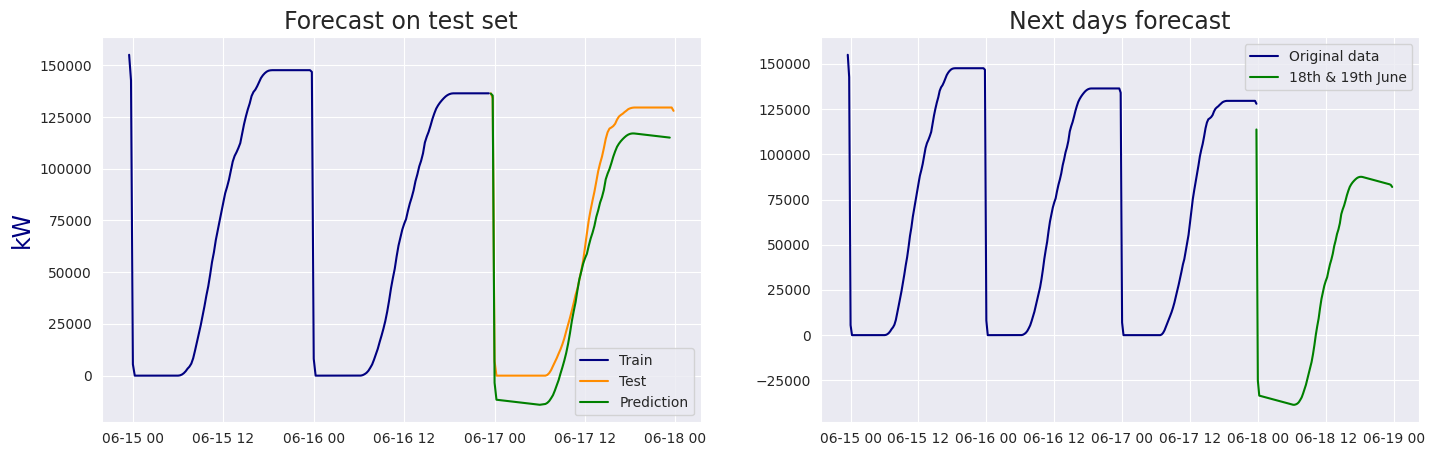

In [19]:
prediction=pd.DataFrame(arima_model.predict(n_periods=96),index=test.index)
prediction.columns=['predicted_yield']

fig,ax= plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
ax[0].plot(train,label='Train',color='navy')
ax[0].plot(test,label='Test',color='darkorange')
ax[0].plot(prediction,label='Prediction',color='green')
ax[0].legend()
ax[0].set_title('Forecast on test set',size=17)
ax[0].set_ylabel('kW',color='navy',fontsize=17)


f_prediction=pd.DataFrame(arima_model.predict(n_periods=194),index=future_dates)
f_prediction.columns=['predicted_yield']
ax[1].plot(pred_gen,label='Original data',color='navy')
ax[1].plot(f_prediction,label='18th & 19th June',color='green')
ax[1].legend()
ax[1].set_title('Next days forecast',size=17)
plt.show()

## Model summary:

The code displays a summary of the ARIMA model, showing statistical information and model evaluation metrics such as AIC, BIC, and the coefficients of the model.






In [20]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  192
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 96)   Log Likelihood                -764.507
Date:                             Mon, 24 Jul 2023   AIC                           1537.014
Time:                                     08:24:04   BIC                           1547.229
Sample:                                 06-14-2020   HQIC                          1541.141
                                      - 06-16-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -118.0910     91.486     -1.291      0.197    -297.400      61.218
ar.L1         -0.1129      0.394     -0.287      0.774      -0.885       0.659
ma.L1         -0.1131      0.396     -0.285      0.775      -0.890       0.663
sigma2      6.406e+05   6.53e+04      9.815      0.000    5.13e+05    7.68e+05
===================================================================================
Ljung-Box (L1) (Q):                  19.68   Jarque-Bera (JB):                36.43
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.55
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""